# Human Kidney Cancer dataset multiome preprocessing

In [1]:
file_path = "/Users/isabelgiray/Desktop/TUM/3.Semester/Computational_Methods_for_Single_cell_biology/H_Kidney_Cancer_Chromium_Nuc_Iso_vs_SaltyEZ_vs_ComplexTissueDP_filtered_feature_bc_matrix.h5"

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versi

In [3]:
mdata = mu.read_10x_h5(file_path)
mdata.var_names_make_unique()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /Users/isabelgiray/Desktop/TUM/3.Semester/Computational_Methods_for_Single_cell_biology/H_Kidney_Cancer_Chromium_Nuc_Iso_vs_SaltyEZ_vs_ComplexTissueDP_filtered_feature_bc_matrix.h5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mudata/_core/mudata.py:915: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-package

In [4]:
mdata

MuData object with n_obs × n_vars = 22772 × 103751
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	22772 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	22772 x 67150
      var:	'gene_ids', 'feature_types', 'genome', 'interval'

# Preprocessing of RNA

In [5]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 22772 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [6]:
rna.var_names_make_unique()

In [7]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')

In [8]:
sc.pp.calculate_qc_metrics(
    rna, qc_vars=['mt'], inplace=True, percent_top=[20],log1p=True
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


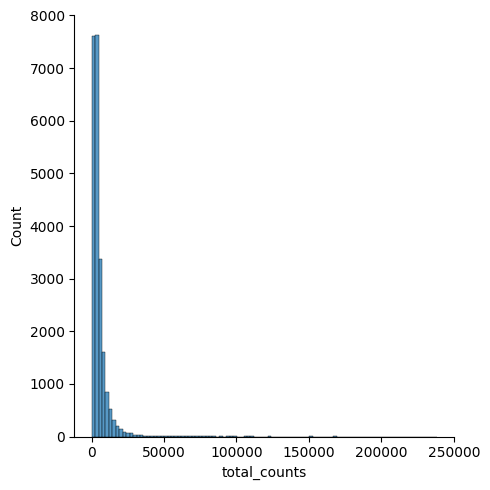

In [9]:
p1 = sns.displot(rna.obs["total_counts"], bins=100, kde=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


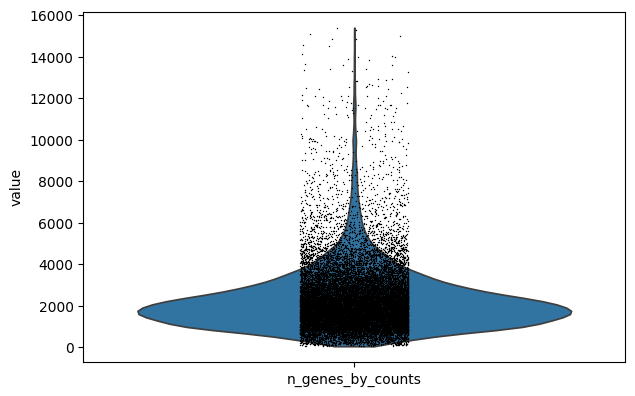

In [10]:
p5 = sc.pl.violin(rna, 'n_genes_by_counts')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


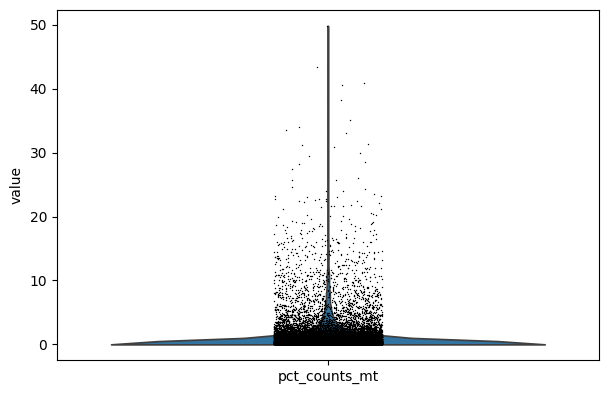

In [11]:
p2 = sc.pl.violin(rna, "pct_counts_mt")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


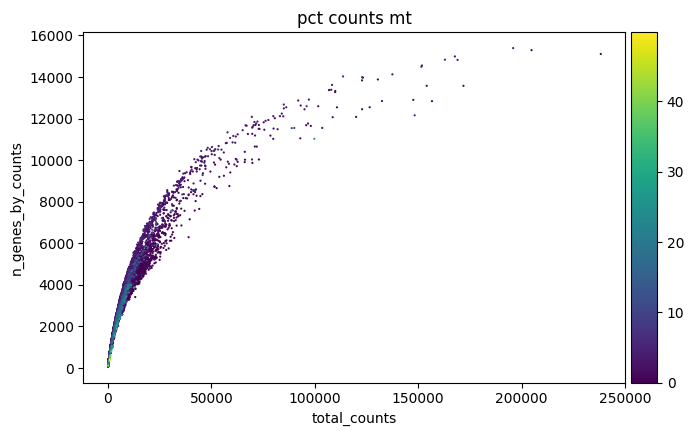

In [12]:
p3 = sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt",size=10)

In [13]:
rna

AnnData object with n_obs × n_vars = 22772 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [14]:
sc.pp.filter_cells(rna, min_genes=300)
sc.pp.filter_cells(rna, max_genes=10000)

In [15]:
rna

AnnData object with n_obs × n_vars = 22318 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [16]:
rna = rna[rna.obs['total_counts'] >= 2000, :]
rna = rna[rna.obs['total_counts'] <= 20000, :]

In [17]:
rna

View of AnnData object with n_obs × n_vars = 16346 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [18]:
rna = rna[rna.obs['pct_counts_mt'] < 20, :]

In [19]:
rna

View of AnnData object with n_obs × n_vars = 16310 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

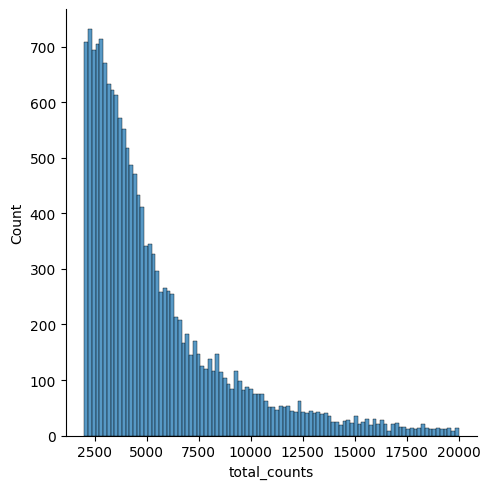

In [20]:
p1 = sns.displot(rna.obs["total_counts"], bins=100, kde=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


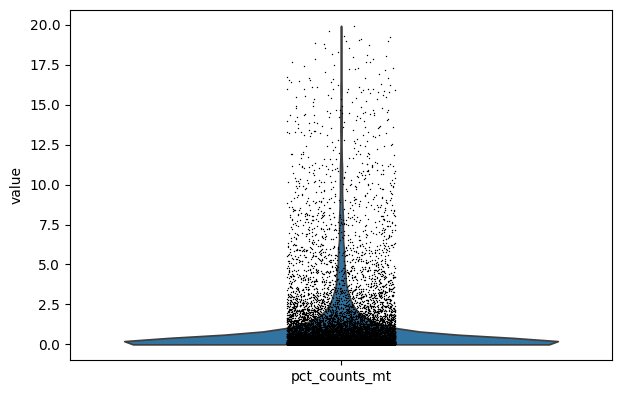

In [21]:
p2 = sc.pl.violin(rna, "pct_counts_mt")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


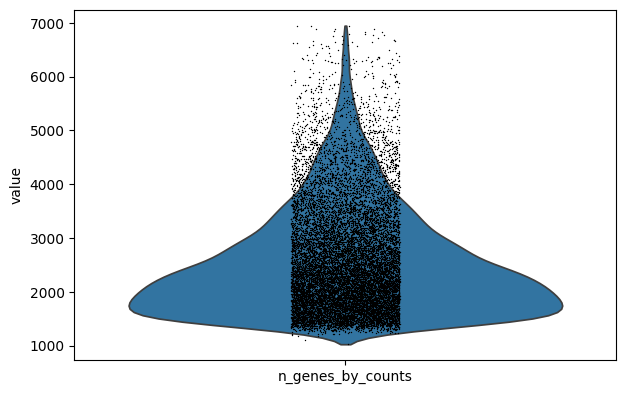

In [22]:
p6 = sc.pl.violin(rna, 'n_genes_by_counts')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


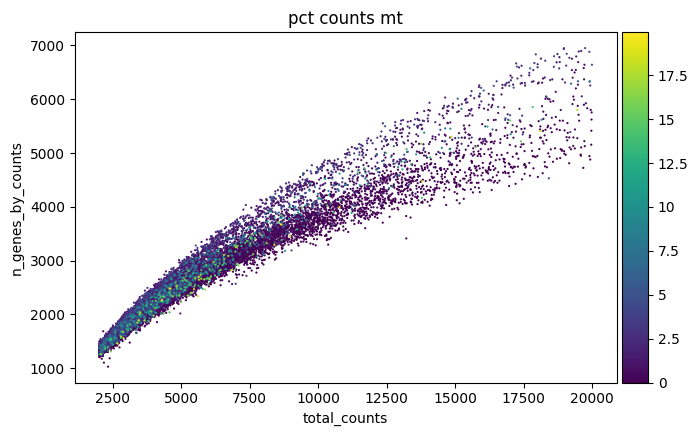

In [23]:
p3 = sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt",size=10)

In [24]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [25]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


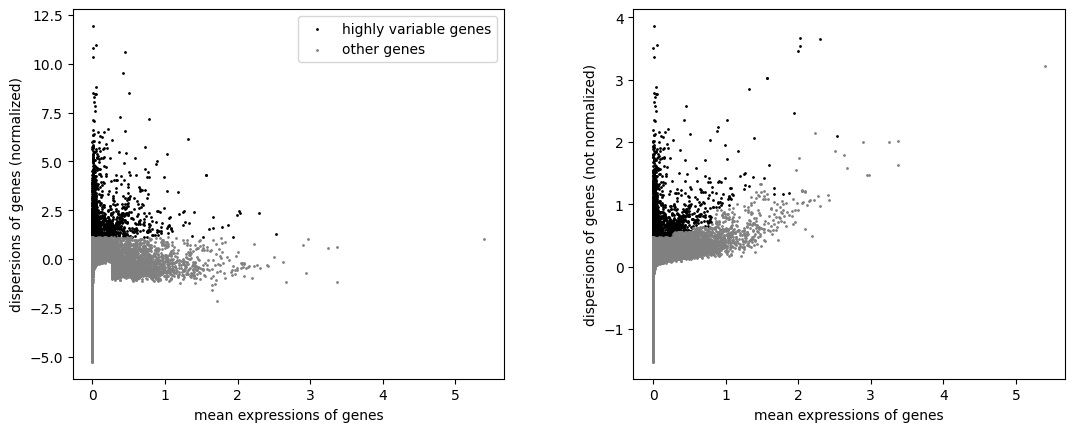

In [26]:
sc.pl.highly_variable_genes(rna)

In [27]:
rna = rna[:, rna.var.highly_variable]

In [28]:
rna

View of AnnData object with n_obs × n_vars = 16310 × 2000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [29]:
sc.tl.pca(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


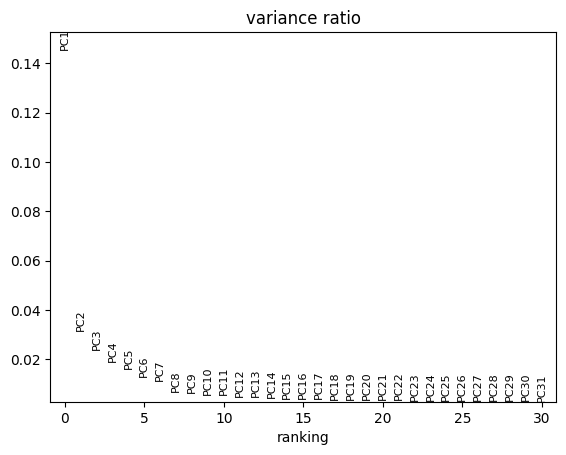

In [30]:
sc.pl.pca_variance_ratio(rna)

In [31]:
sc.pp.neighbors(rna)

In [32]:
sc.tl.umap(rna)

In [33]:
sc.tl.leiden(rna)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


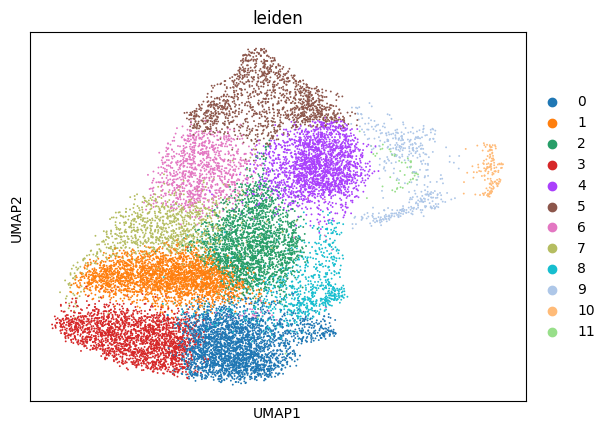

In [34]:
sc.pl.umap(rna, color='leiden')

# Processing chromatin accessibility

In [35]:
from muon import atac as ac

In [36]:
atac = mdata.mod['atac']
atac

AnnData object with n_obs × n_vars = 22772 × 67150
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [37]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [38]:
atac

AnnData object with n_obs × n_vars = 22772 × 67150
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

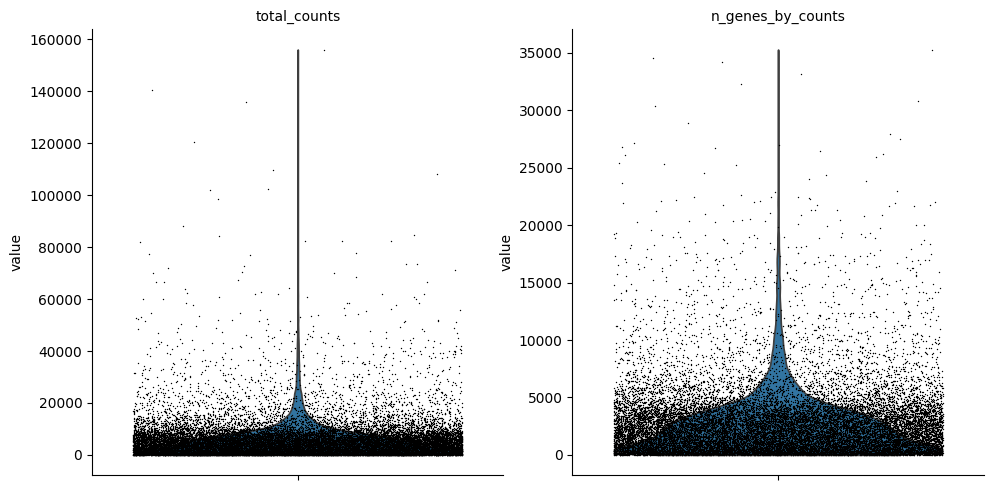

In [39]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [40]:
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 15)

In [41]:
atac

AnnData object with n_obs × n_vars = 22772 × 67150
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [42]:
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 500) & (x <= 20000))

In [43]:
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 500) & (x <= 40000))

In [44]:
atac

AnnData object with n_obs × n_vars = 18288 × 67150
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

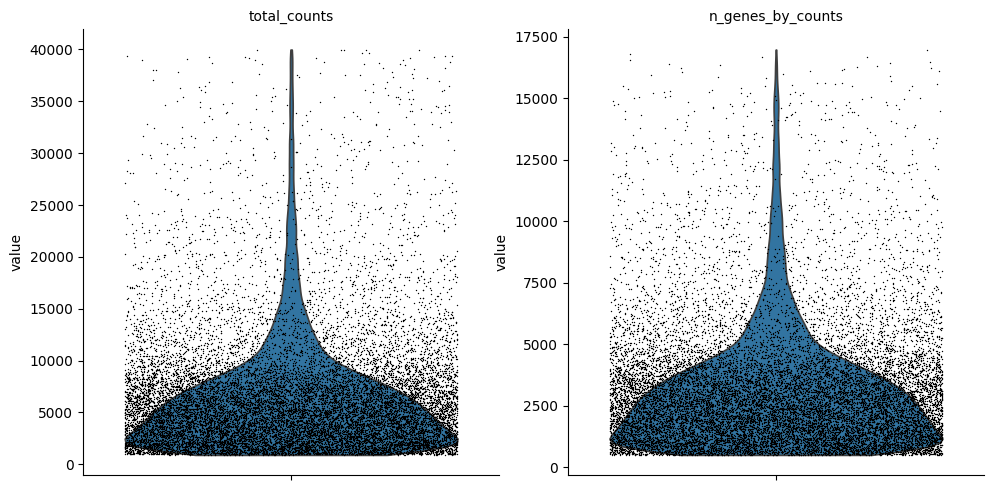

In [45]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

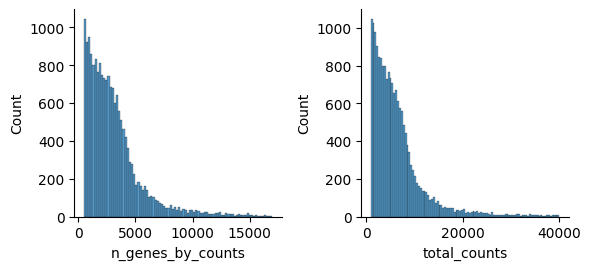

In [46]:
mu.pl.histogram(atac, ['n_genes_by_counts', 'total_counts'])